In [1]:
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

In [7]:
lc1 = fits.open('AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q0.lc')
lc2 = fits.open('AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q1.lc')
lc3 = fits.open('AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q2.lc')
lc4 = fits.open('AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q3.lc')

lc = [lc1[1].data, lc2[1].data, lc3[1].data, lc4[1].data]

In [14]:
lc[0].field('TIME')[0]

307370636.5

In [15]:
grb_time = 307372337.5
grb_ind = np.where(lc[0].field('TIME')==grb_time)[0][0]

In [16]:
grb_start_time = grb_time - 100
grb_end_time = grb_time + 100

In [30]:
grb_start_ind = np.where(lc[0].field('TIME')==grb_start_time)[0][0]
grb_end_ind = np.where(lc[0].field('TIME')==grb_end_time+1)[0][0]

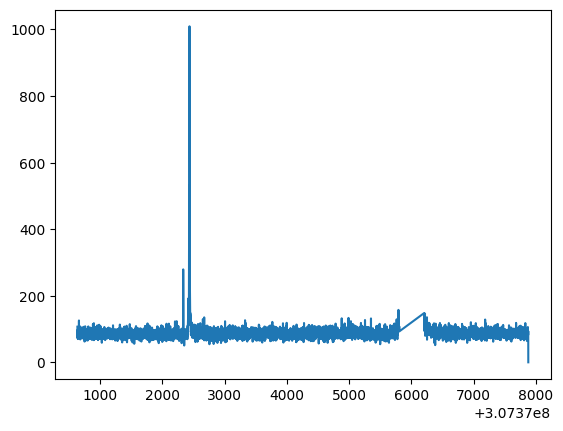

In [33]:
plt.plot(lc[0].field('TIME'), lc[0].field('RATE'))

In [31]:
def zero_runs(a):
    # Create an array that is 1 where a is 0, and pad each end with an extra 0.
    iszero = np.concatenate(([0], np.equal(a, 0).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return ranges

In [32]:
def get_saa(lc_data):
    saa_index = np.where(zero_runs(lc_data)[:,1] - zero_runs(lc_data)[:,0] == np.max(zero_runs(lc_data)[:,1] - zero_runs(lc_data)[:,0]))[0][0]
    saa_start = zero_runs(lc_data)[saa_index][0]
    saa_end = zero_runs(lc_data)[saa_index][-1]
    return (saa_start, saa_end)

In [ ]:
saa_start_ind, saa_end_ind = get_saa(lc[0].field('RATE'))
b = np.zeros_like(lc[0].field('RATE'))
